[[-0.13059106 -0.35829379]]


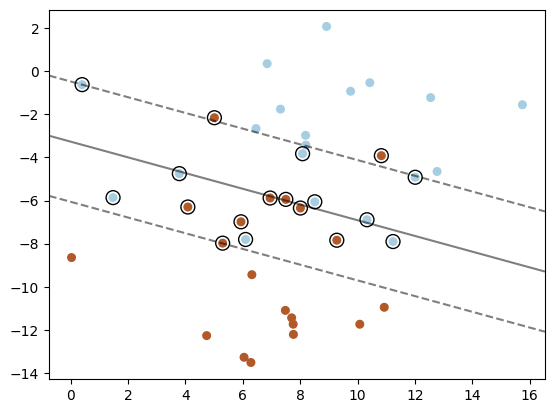

[[-0.29303081 -0.66549196]]


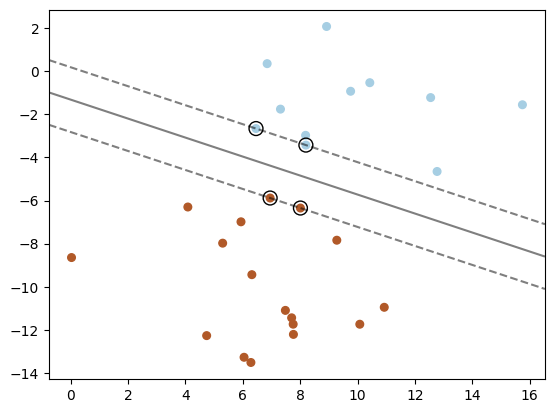

In [15]:
# import svm from sci kit
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt

# load a random dataset suitable for svm binary
# classification
from sklearn.datasets import make_blobs

# create a random dataset that is linearly separable but with noise
X, y = make_blobs(n_samples=40, centers=2, random_state=6, cluster_std=3.0)

# plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# create a svm classifier
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)

YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# get the decision boundary
Z = clf.decision_function(xy).reshape(XX.shape)

# print weights and biases
print(clf.coef_)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1],
              alpha=0.5, linestyles=['--', '-', '--'])

# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')

plt.show()


# Go back and remove any support vector that is not on the margin
# and retrain the model.  How does the decision boundary change?

supp_vecs = clf.support_vectors_

import math
# check error of each support vector

# make a copy of X,y
X_new = np.copy(X)
y_new = np.copy(y)

delete_list = []

for i in range(len(X)):
    # check if the point is a support vector
    if X[i] not in supp_vecs:
        continue
    
    # get the magnitude of the decision function
    mag = clf.decision_function([X[i]])[0]
        
    # get the sign of the decision function
    sign = np.sign(mag)
    # get the sign of the label
    label = np.sign(y[i])
    # if they are not the same remove it from X,y
    if sign != label:
        delete_list.append(i)
    else:
        pass
        # if they are the same, check the magnitude
        # if the magnitude is not close to 1, remove it
        #if not math.isclose(abs(mag), 1, abs_tol=0.05):
        #    delete_list.append(i)

# delete the points from X,y
#print(len(y_new))
X = np.delete(X_new, delete_list, axis=0)
y = np.delete(y_new, delete_list, axis=0)
#print(len(y_new))


# plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# create a svm classifier
clf = svm.SVC(kernel='linear', C=10000)
clf.fit(X, y)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)

YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# get the decision boundary
Z = clf.decision_function(xy).reshape(XX.shape)

# print weights and biases
print(clf.coef_)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1],
              alpha=0.5, linestyles=['--', '-', '--'])

# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')

plt.show()


In [ ]:
z = [[19,6],[19,3],[17,8],[17,1],[16,4],[14,5],[13,8],[13,1],[11,6],[11,3]]
import numpy as np

z = np.array(z)

print(np.mean(z, axis=0))
print()
print(np.cov(z.T))
print()


# print determinant
print(np.linalg.det(np.cov(z.T)))
print()

print(np.linalg.inv(np.cov(z.T)))

[15.   4.5]

[[ 9.11111111 -0.11111111]
 [-0.11111111  6.5       ]]

59.20987654320991

[[0.10977898 0.00187656]
 [0.00187656 0.15387823]]
